# Web Scraping com Python e Análise de Sentimento

O presente estudo explorou um conjunto de frases extraídas de um site de propósito educacional/demonstrativo com o objetivo de realizar uma análise descritiva de seus sentimentos e identificar padrões de frequência dos autores. Por meio de técnicas de web scraping em Python, foi construído um pipeline para extrair, limpar e carregar dados textuais, que foram subsequentemente submetidos a análises de Processamento de Linguagem Natural (PLN).

## Fonte

https://quotes.toscrape.com/


## Etapas do Projeto

1. **Coleta de Dados (Web Scraping):** Extração automatizada das frases e seus respectivos autores do site https://quotes.toscrape.com/ utilizando as bibliotecas requests e BeautifulSoup em Python.
2. **Organização e Carregamento dos Dados (ETL - Load):** Estruturação dos dados extraídos em um DataFrame da biblioteca pandas e subsequente carregamento para um arquivo CSV (frases_raspadas.csv) para persistência e fácil acesso.
3. **Análise Descritiva de Autores:** Identificação dos autores mais frequentes com a biblioteca collections.Counter, seguida da visualização gráfica dessa frequência usando matplotlib e seaborn.
4. **Análise de Sentimentos (PLN):** Aplicação do SentimentIntensityAnalyzer (VADER) da biblioteca NLTK para determinar o sentimento (positivo, negativo, neutro e composto) de cada frase em inglês.
5. **Visualizações:** Criação de gráficos de barras para a distribuição de sentimentos e para o sentimento médio dos autores, além da geração de uma nuvem de palavras para as frases, utilizando matplotlib, seaborn e WordCloud.

## Importando as Bibliotecas Necessárias

In [75]:
# Importando a biblioteca necessárias
from bs4 import BeautifulSoup
import pandas as pd
from collections import Counter
from wordcloud import WordCloud # Importa a classe WordCloud
import matplotlib.pyplot as plt # Importa matplotlib para exibir a imagem
import seaborn as sns # Importar seaborn para o gráfico
import nltk
import spacy
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer # Importa o SIA

# Baixando recursos do NLTK 
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Carregando modelo do spaCy para lematização
nlp = spacy.load("pt_core_news_sm")  # Para português

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Alanf\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Alanf\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Alanf\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [14]:
# Importando a classe 'BeautifulSoup' do módulo 'bs4' (Beautiful Soup), usada para analisar HTML e XML.
from bs4 import BeautifulSoup

In [3]:
# Fazendo uma requisição GET para a URL especificada e armazena a resposta na variável 'site'.
site = requests.get('https://quotes.toscrape.com/')

In [4]:
# Criando um objeto BeautifulSoup a partir do conteúdo HTML da resposta ('site.text') usando o parser HTML padrão.
dados_site = BeautifulSoup(site.text, 'html.parser')

## Testando o código

In [5]:
# testando para saber se tudo está funcionando
print(dados_site.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   Quotes to Scrape
  </title>
  <link href="/static/bootstrap.min.css" rel="stylesheet"/>
  <link href="/static/main.css" rel="stylesheet"/>
 </head>
 <body>
  <div class="container">
   <div class="row header-box">
    <div class="col-md-8">
     <h1>
      <a href="/" style="text-decoration: none">
       Quotes to Scrape
      </a>
     </h1>
    </div>
    <div class="col-md-4">
     <p>
      <a href="/login">
       Login
      </a>
     </p>
    </div>
   </div>
   <div class="row">
    <div class="col-md-8">
     <div class="quote" itemscope="" itemtype="http://schema.org/CreativeWork">
      <span class="text" itemprop="text">
       “The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”
      </span>
      <span>
       by
       <small class="author" itemprop="author">
        Albert Einstein
       </small>
       <a href="/author/Albert

## Organização e Carregamento dos Dados (ETL - Load)

In [32]:
# --- 1. EXTRAÇÃO ---
frases = dados_site.find_all('span', class_='text')
autores = dados_site.find_all('small', class_='author')

# Crie novas listas vazias para armazenar o texto limpo
frases_texto = []
autores_texto = []

# Coletando as frases e autores
# Itere sobre os elementos HTML que você realmente encontrou
for i in range(len(frases_elements)):
    frases_texto.append(frases[i].text.strip()) # Use frases_elements[i]
    autores_texto.append(autores[i].text.strip()) # Use autores_elements[i]

In [33]:
# --- 2. TRANSFORMAÇÃO ---
# Criando um DataFrame pandas para organizar os dados
dados_frases = pd.DataFrame({
    'Frase': frases_texto, # Use frases_texto
    'Autor': autores_texto # Use autores_texto
})

In [46]:
# --- 3. CARREGAMENTO ---
# Carregar os dados em um arquivo CSV
df = 'frases_raspadas.csv'
dados_frases.to_csv(nome_arquivo, index=False, encoding='utf-8')

print(f"Dados extraídos, transformados e carregados em '{nome_arquivo}' com sucesso!")
print("\nDataFrame:")
print(dados_frases.head(10))

Dados extraídos, transformados e carregados em 'frases_raspadas.csv' com sucesso!

DataFrame:
                                               Frase              Autor
0  “The world as we have created it is a process ...    Albert Einstein
1  “It is our choices, Harry, that show what we t...       J.K. Rowling
2  “There are only two ways to live your life. On...    Albert Einstein
3  “The person, be it gentleman or lady, who has ...        Jane Austen
4  “Imperfection is beauty, madness is genius and...     Marilyn Monroe
5  “Try not to become a man of success. Rather be...    Albert Einstein
6  “It is better to be hated for what you are tha...         André Gide
7  “I have not failed. I've just found 10,000 way...   Thomas A. Edison
8  “A woman is like a tea bag; you never know how...  Eleanor Roosevelt
9  “A day without sunshine is like, you know, nig...       Steve Martin


## Criando uma Nuvem de Palavras (WordCloud)

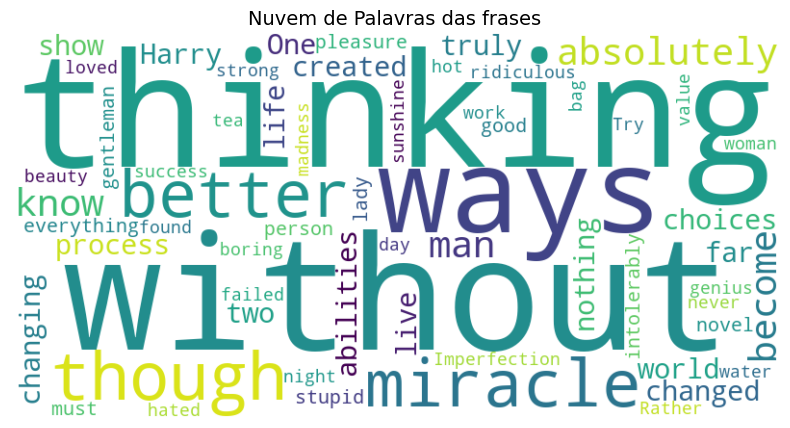

In [44]:
all_words = " ".join(dados_frases["Frase"])

# Gerar a nuvem de palavras
wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="viridis").generate(all_words)

# Mostrar a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Nuvem de Palavras das frases", fontsize=14)
plt.show()

## Análise Descritiva de Autores

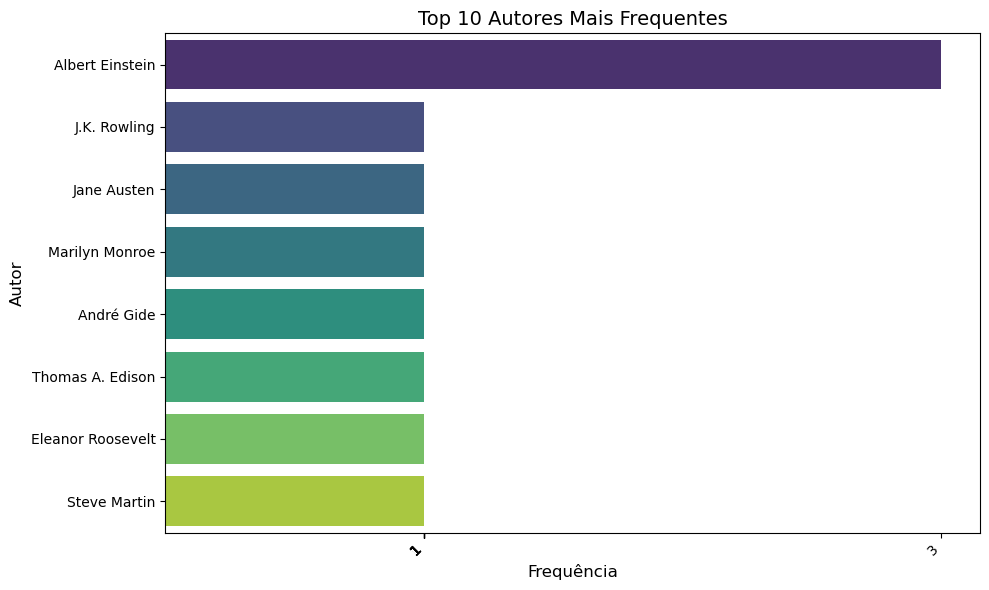

In [57]:
# Contar a frequência de cada autor
# Usamos Counter para contar as ocorrências
top_autores = Counter(autores_texto).most_common(10)

# Criar gráfico de barras
plt.figure(figsize=(10, 6)) # Ajuste o tamanho da figura para melhor visualização
sns.barplot(x=[autor[1] for autor in top_autores], y=[autor[0] for autor in top_autores], palette="viridis")
plt.xlabel("Frequência", fontsize=12)
plt.ylabel("Autor", fontsize=12)
plt.title("Top 10 Autores Mais Frequentes", fontsize=14)
frequencias_x = [autor[1] for autor in top_autores]
plt.xticks(ticks=frequencias_x, rotation=45, ha='right') # Rotacionar os rótulos do eixo X se houver muitos
plt.tight_layout() # Ajusta o layout para evitar sobreposição de rótulos
plt.show()

## Análise de Sentimentos (PLN):

A análise de sentimentos é uma técnica do Processamento de Linguagem Natural (NLP) utilizada para identificar e categorizar emoções expressas em um texto, como positividade, negatividade ou neutralidade

In [69]:
# Baixar recursos do NLTK
nltk.download("vader_lexicon")

# Carregar modelo do spaCy para PLN
nlp = spacy.load("pt_core_news_sm")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Alanf\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!



DataFrame com sentimentos:
                                               Frase              Autor  \
0  “The world as we have created it is a process ...    Albert Einstein   
1  “It is our choices, Harry, that show what we t...       J.K. Rowling   
2  “There are only two ways to live your life. On...    Albert Einstein   
3  “The person, be it gentleman or lady, who has ...        Jane Austen   
4  “Imperfection is beauty, madness is genius and...     Marilyn Monroe   
5  “Try not to become a man of success. Rather be...    Albert Einstein   
6  “It is better to be hated for what you are tha...         André Gide   
7  “I have not failed. I've just found 10,000 way...   Thomas A. Edison   
8  “A woman is like a tea bag; you never know how...  Eleanor Roosevelt   
9  “A day without sunshine is like, you know, nig...       Steve Martin   

     neg    neu    pos  compound Sentimento  
0  0.000  0.905  0.095    0.2500   Positivo  
1  0.000  0.838  0.162    0.4404   Positivo  
2  0.118

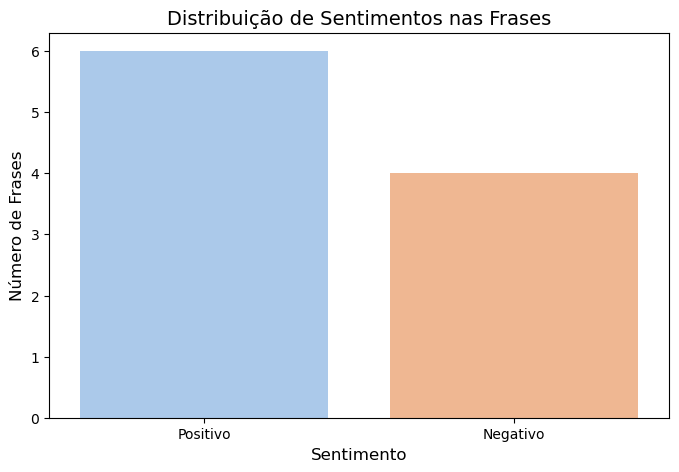

In [74]:
# --- 1. Inicializar o analisador de sentimentos ---
sia = SentimentIntensityAnalyzer()

# --- 2. Aplicar a análise de sentimento a cada frase ---
# Criar novas colunas no DataFrame para as pontuações de sentimento
dados_frases['neg'] = dados_frases['Frase'].apply(lambda frase: sia.polarity_scores(frase)['neg'])
dados_frases['neu'] = dados_frases['Frase'].apply(lambda frase: sia.polarity_scores(frase)['neu'])
dados_frases['pos'] = dados_frases['Frase'].apply(lambda frase: sia.polarity_scores(frase)['pos'])
dados_frases['compound'] = dados_frases['Frase'].apply(lambda frase: sia.polarity_scores(frase)['compound'])

# O 'compound score' é o mais importante para a classificação geral:
# - Se compound >= 0.05: Positivo
# - Se compound <= -0.05: Negativo
# - Caso contrário (entre -0.05 e 0.05): Neutro

# Você pode criar uma coluna para a classificação final do sentimento
def classify_sentiment(score):
    if score >= 0.05:
        return 'Positivo'
    elif score <= -0.05:
        return 'Negativo'
    else:
        return 'Neutro'

dados_frases['Sentimento'] = dados_frases['compound'].apply(classify_sentiment)

# --- 3. Visualizar os resultados (Exemplo: Contagem de sentimentos) ---
print("\nDataFrame com sentimentos:")
print(dados_frases.head(10))

print("\nContagem de frases por sentimento:")
sentiment_counts = dados_frases['Sentimento'].value_counts()
print(sentiment_counts)

# Criar um gráfico de barras da contagem de sentimentos
plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="pastel")
plt.xlabel("Sentimento", fontsize=12)
plt.ylabel("Número de Frases", fontsize=12)
plt.title("Distribuição de Sentimentos nas Frases", fontsize=14)
plt.show()